<a name="top"></a>
# Lyft Models

## Contents:
**1. [Exploration Data Analysis (EDA) of Lyft Data](#Exploration-Data-Analysis-(EDA)-of-Lyft-Data)**

**2. [First Model for Lyft using Linear Regression](#First-Model-for-Lyft-using-Linear-Regression)**

**3. [2nd Model for Lyft Data Using Random Forest Regressor](#2nd-Model-for-Lyft-Data-Using-Random-Forest-Regressor)**

**4. [3rd Model for Lyft Data Using Elastic Net](#3rd-Model-for-Lyft-Data-Using-Elastic-Net)**

**5. [4th Model for Lyft Using XGB Regressor](#4th-Model-for-Lyft-Using-XGB-Regressor)**

**6. [Results of Summary](#Results-of-Summary)**



## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression, Lasso, Ridge, HuberRegressor
from sklearn.ensemble import ExtraTreesRegressor , RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.externals import joblib
import pickle 

plt.style.use('fivethirtyeight')

%matplotlib inline

<a name="Exploration Data Analysis (EDA) of Lyft Data"></a>
## Exploration Data Analysis (EDA) of Lyft Data

In [2]:
lyft_data = pd.read_csv('lyft.csv')

In [3]:
lyft_data.columns

Index(['Unnamed: 0', 'distance', 'cab_type', 'price', 'temp/f', 'cloud cover',
       'pressure', 'rain', 'humidity', 'wind', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared'],
      dtype='object')

In [4]:
#Removed cab_type from the dataset 
lyft_data = lyft_data.drop(["cab_type", 'Unnamed: 0'], axis=1)

In [5]:
lyft_data.price.describe()

count    546266.000000
mean         17.211685
std           9.818397
min           2.500000
25%           9.000000
50%          16.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [6]:
lyft_data['price_bins'] = pd.cut(lyft_data.price, bins = [0,10,20,30,40,50,60,70,80,90,100],
                                labels = ['0-10','10-20','20-30','30-40','40-50','50-60',
                                         '60-70','70-80','80-90','90-100'])

In [7]:
#Visualizing the prices in bins that were formed
lyft_data['price_bins'].value_counts(normalize = True)

10-20     0.415885
0-10      0.261658
20-30     0.225529
30-40     0.079353
40-50     0.013565
50-60     0.002821
60-70     0.000800
70-80     0.000273
80-90     0.000090
90-100    0.000026
Name: price_bins, dtype: float64


# Correlation Matrix to observe the collinearity between features and the correlation with the target column

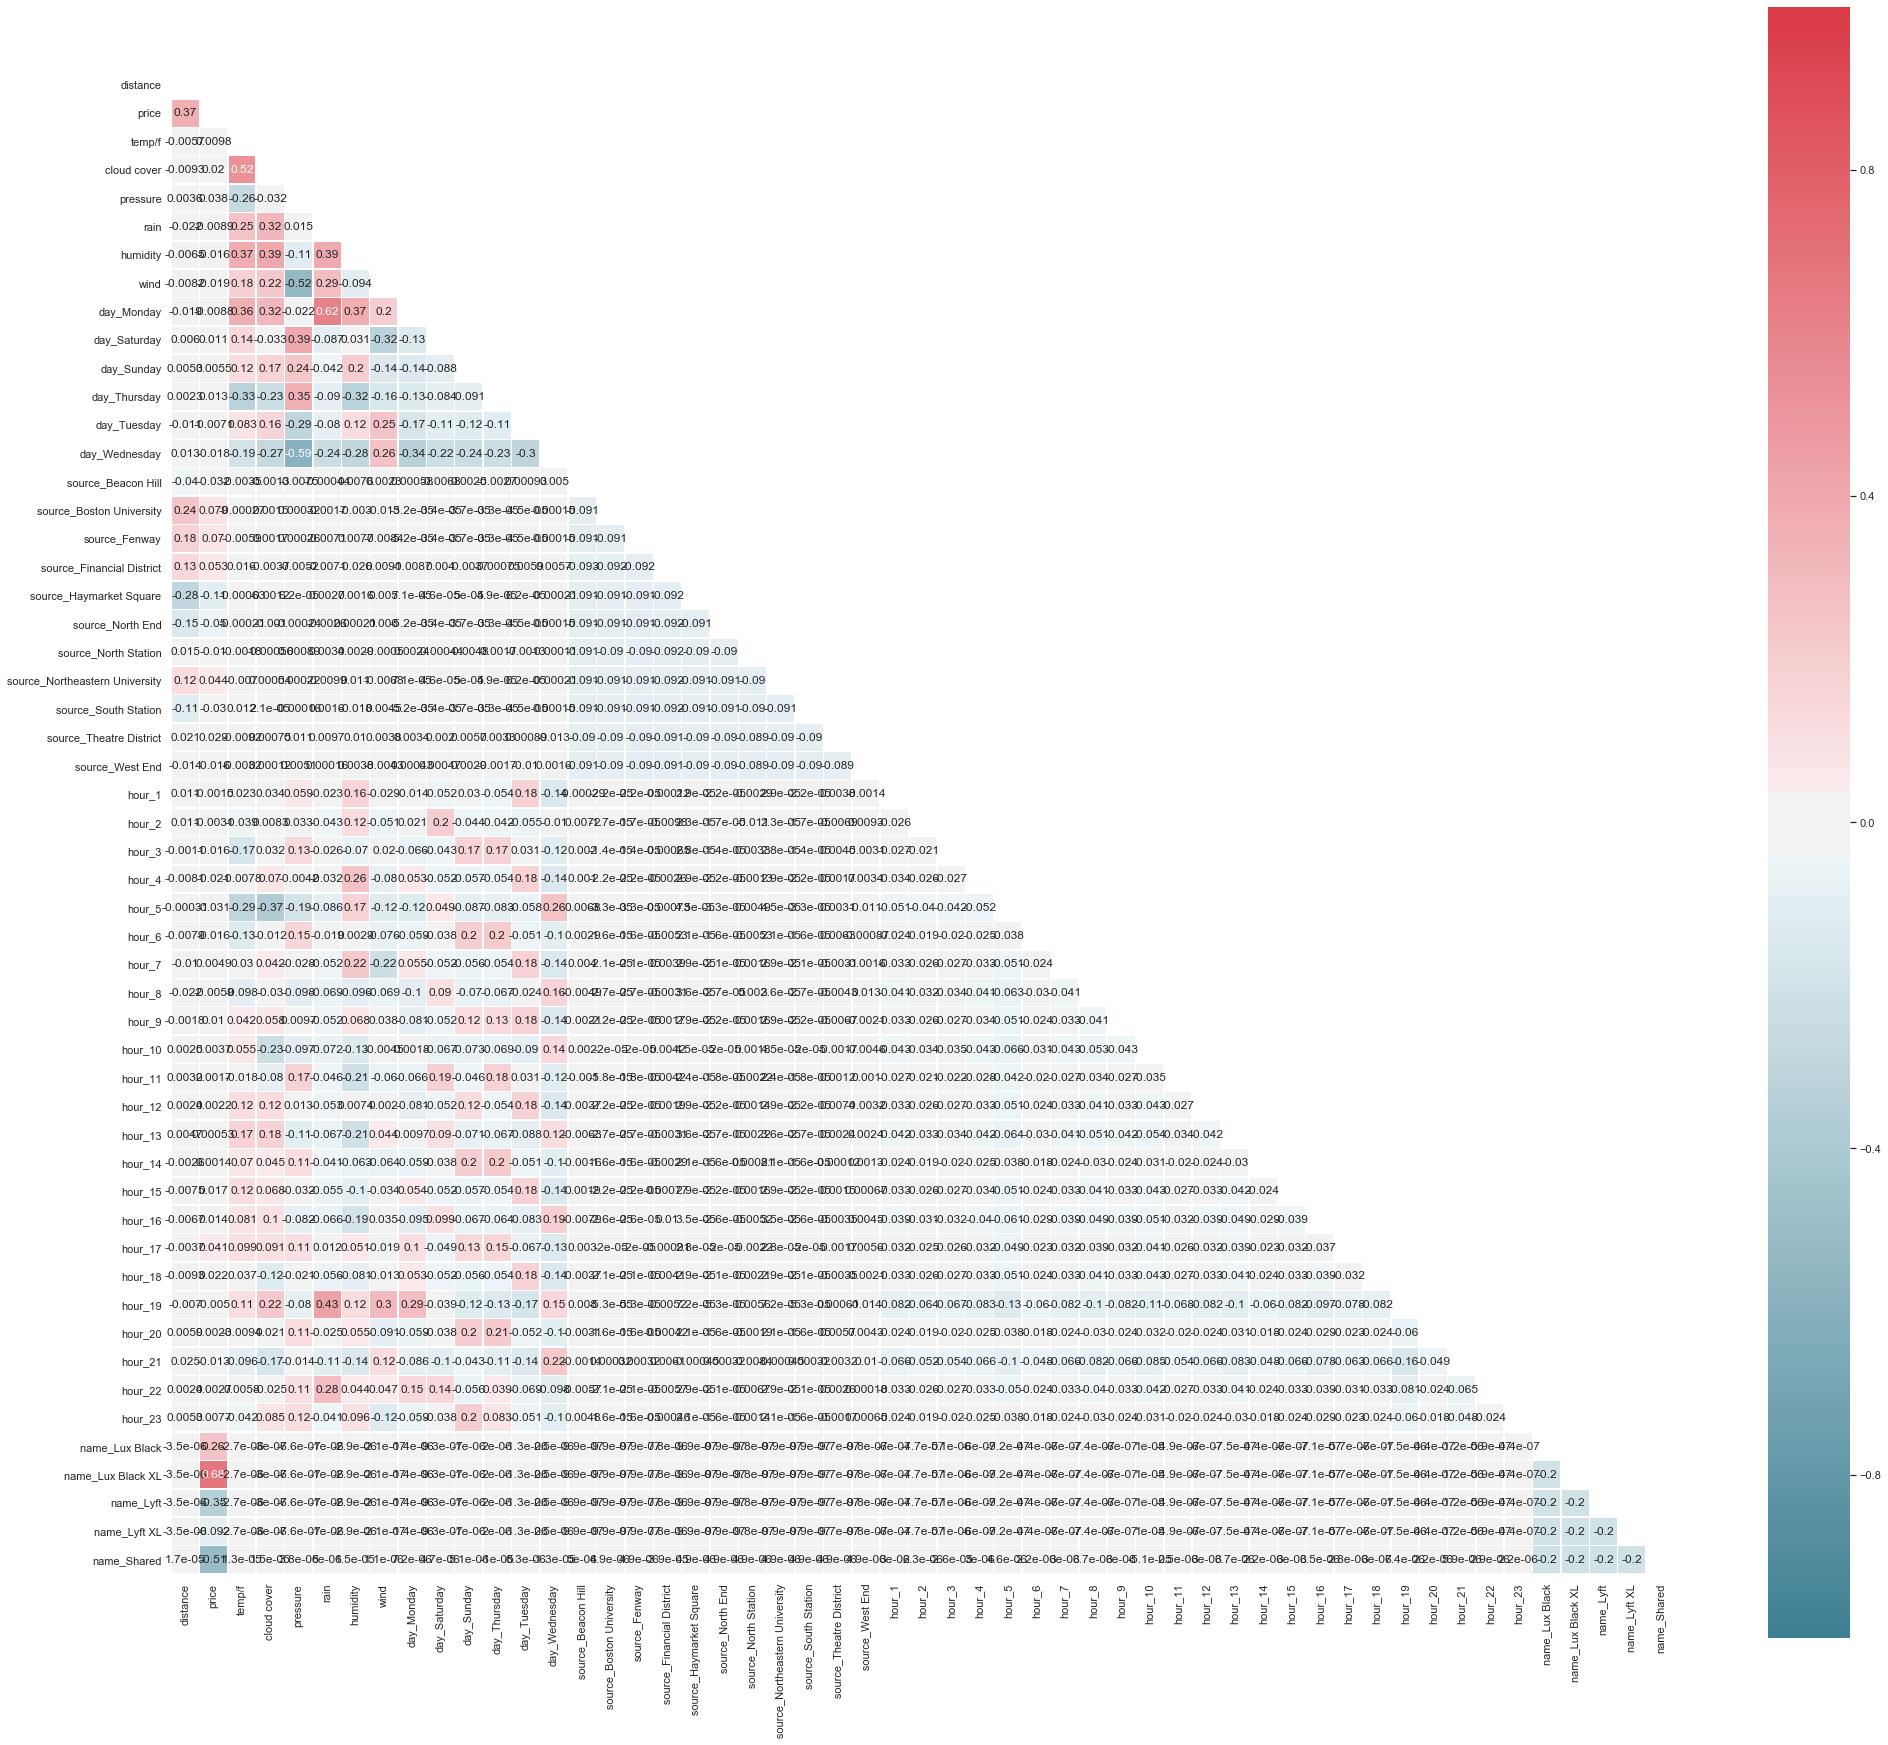

In [7]:
#Done with cleaning, we need to do the correlation matrix (Heatmap)
# Compute the correlation matrix
sns.set(style="white")
corr = lyft_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin = -1.0, center=0,
            square=True, linewidths=.5, annot  = True)


In [8]:
abs(lyft_data.corr()['price']).sort_values(ascending = False)

price                             1.000000
name_Lux Black XL                 0.676081
name_Shared                       0.511779
distance                          0.365076
name_Lyft                         0.350064
name_Lux Black                    0.257645
source_Haymarket Square           0.108261
name_Lyft XL                      0.092112
source_Boston University          0.079090
source_Fenway                     0.069809
source_Financial District         0.052736
source_North End                  0.050313
source_Northeastern University    0.044493
hour_17                           0.041205
pressure                          0.038015
source_Beacon Hill                0.032081
hour_5                            0.031319
source_South Station              0.029514
source_Theatre District           0.028769
hour_18                           0.021672
hour_4                            0.020957
cloud cover                       0.019991
wind                              0.019331
day_Wednesd

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129bd7860>,
      dtype=object)

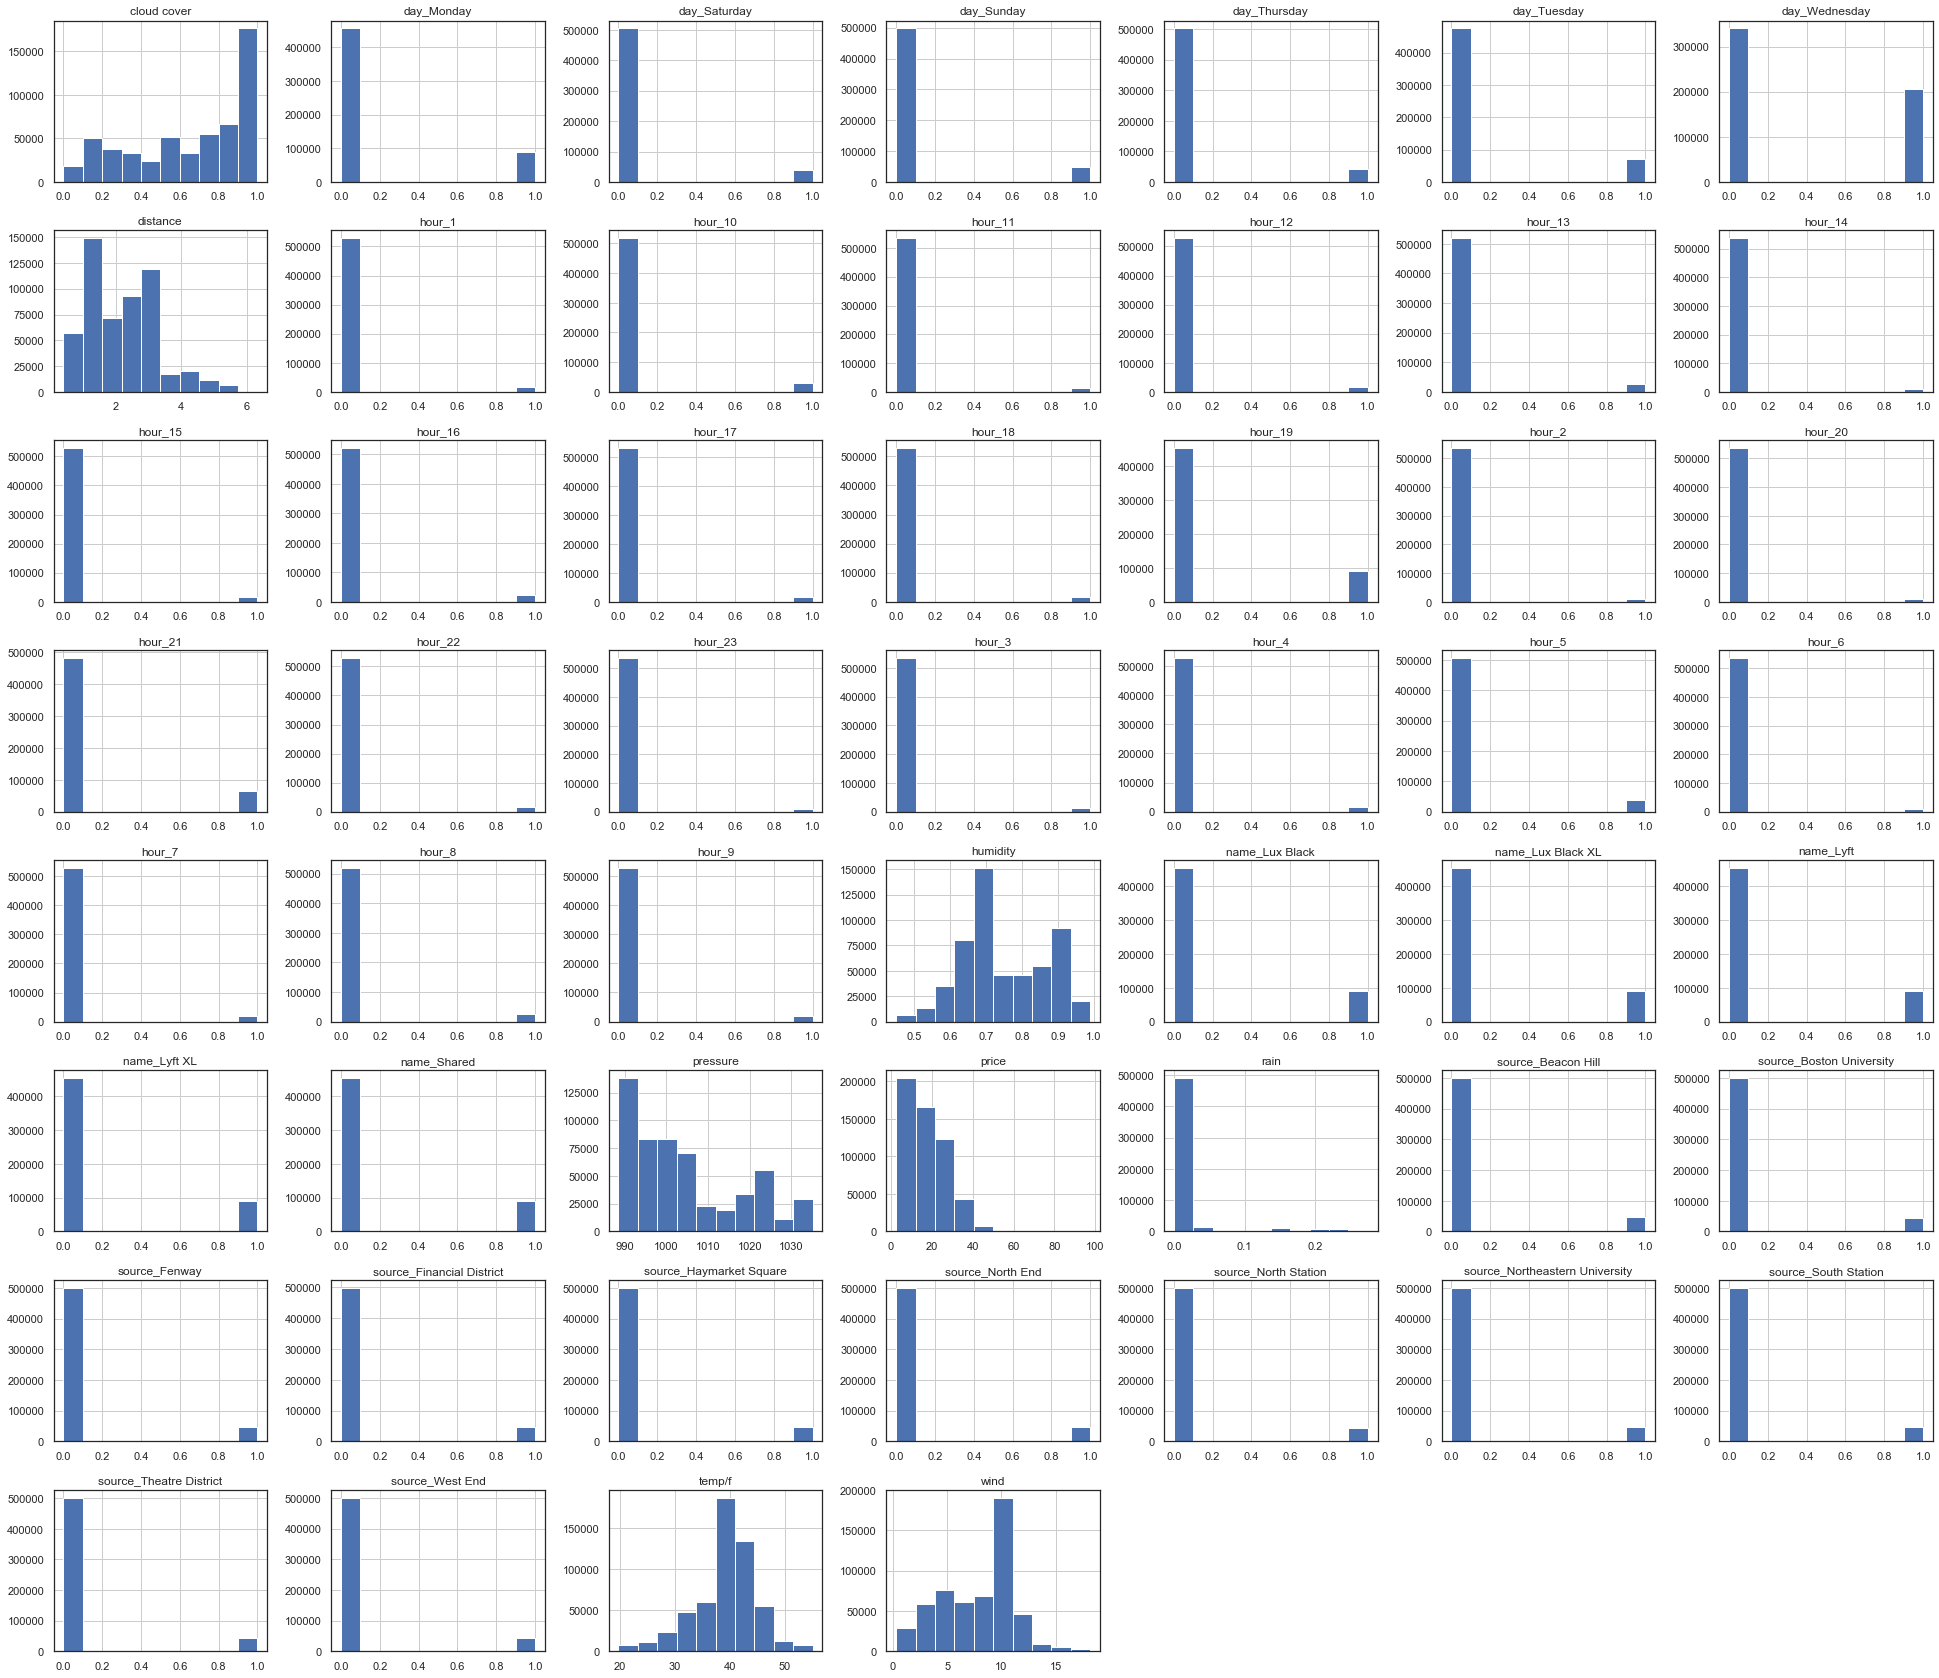

In [9]:
lyft_data.hist(figsize=(30, 30))

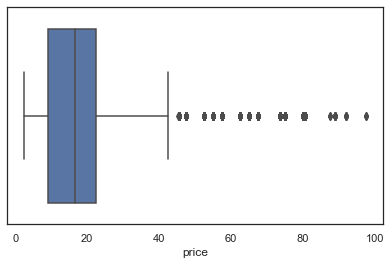

In [10]:
sns.boxplot(lyft_data['price'])

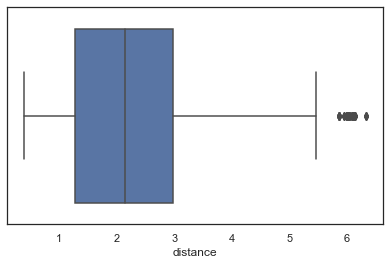

In [11]:
sns.boxplot(lyft_data['distance'])

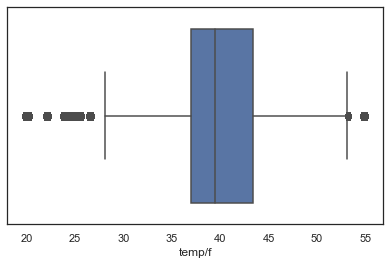

In [12]:
sns.boxplot(lyft_data['temp/f'])

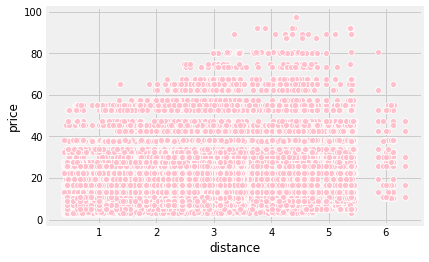

In [138]:
#Plotting some scatter plot of distance against the price
sns.scatterplot(y = lyft_data['price'], x = lyft_data['distance'], color = ['pink'])

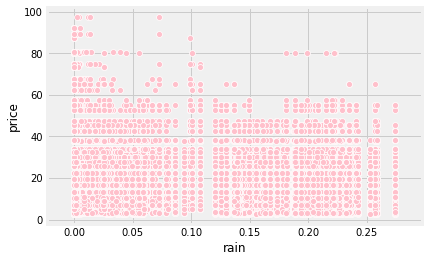

In [139]:
#Plotting some scatter plot of rain against the price
sns.scatterplot(y = lyft_data['price'], x = lyft_data['rain'], color = ['pink'])

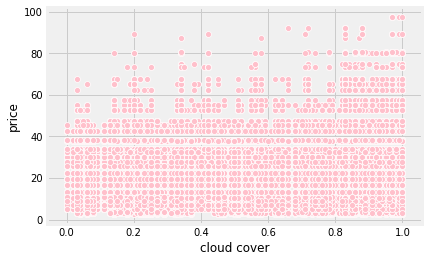

In [140]:
#Plotting some scatter plot of distance against the price
sns.scatterplot(y = lyft_data['price'], x = lyft_data['cloud cover'], color = ['pink'])

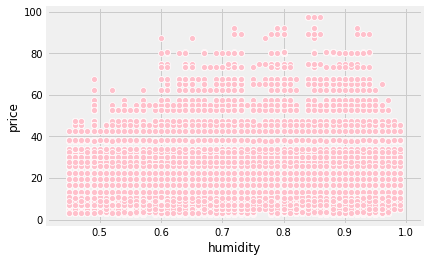

In [141]:
#Plotting some scatter plot of humidity against the price
sns.scatterplot(y = lyft_data['price'], x = lyft_data['humidity'], color = ['pink'])

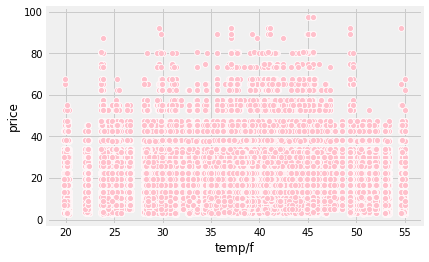

In [142]:
#Plotting some scatter plot of temperature against the price
sns.scatterplot(y = lyft_data['price'], x = lyft_data['temp/f'], color = ['pink'])

[Back to top](#top)


# Modelling for Lyft Data

<a name="First Model for Lyft using Linear Regression"></a>
## First Model for Lyft using Linear Regression

In [62]:
features = ['distance', 'temp/f', 'cloud cover', 'pressure',
       'rain', 'humidity', 'wind', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared']
lX = lyft_data[features]
ly = lyft_data[['price']]
#np.ravel(ly)

In [63]:
lX_train, lX_test, ly_train, ly_test = train_test_split(lX,ly,random_state=23, test_size =0.3, shuffle = True)

In [64]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    #('ext', ExtraTreesRegressor()),
    #('en',ElasticNet()),
    ('lr',LinearRegression()),
    #('svr', SVR()),
    #('xgb', XGBRegressor())
    
    ])
pipe_params = {
    
}


In [65]:
lX_train.shape

(382386, 52)

In [66]:
ly_train.shape

(382386, 1)

In [67]:
cross_val_score(pipe, lX_train, ly_train, cv=3).mean()

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Dat

0.9072101521986795

In [68]:
gs_1 = GridSearchCV(pipe, param_grid=pipe_params, cv=3, verbose=1, n_jobs= -1)
gs_1 = gs_1.fit(lX_train,ly_train)
print(gs_1.best_score_)
print(gs_1.best_estimator_)
gs_1.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.9s finished
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.9072101521986794
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])


{}

In [69]:
gs_1.score(lX_train,ly_train)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.907257334707011

In [70]:
gs_1.score(lX_test,ly_test)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9049195775190028

In [71]:
ly2_pred = gs_1.predict(lX_test)
ly_test['predicted_2'] = ly2_pred

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


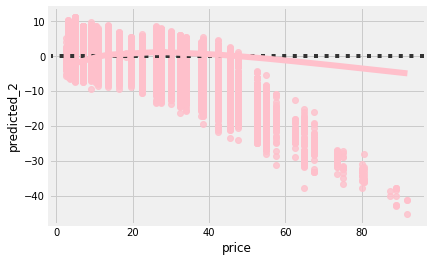

In [72]:
sns.residplot(ly_test['price'],ly_test['predicted_2'], lowess=True, color="pink")

In [73]:
ly_test['diff_2'] = ly_test['predicted_2'] - ly_test['price']

/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
ly_test.head()

,price,predicted_2,diff_2
362087,7.0,10.620536,3.620536
392325,47.5,41.634861,-5.865139
151747,27.5,25.735640,-1.764360
523198,16.5,17.371889,0.871889
135199,16.5,18.632470,2.132470


In [78]:
ly_test['diff_2'].sort_values(ascending = True).head(40000)

425713   -52.651585
45407    -49.878445
516807   -49.718245
55970    -49.645746
217291   -48.405233
223970   -48.405233
354319   -47.098089
434162   -46.858908
137123   -45.543223
452383   -45.338573
449595   -44.875647
449597   -44.867839
449596   -44.858677
338869   -43.882220
425708   -42.495895
227664   -42.311690
430180   -42.305409
393547   -42.240789
101416   -41.845020
463269   -41.742148
232333   -41.611764
324818   -41.558325
46006    -40.985662
349240   -40.643486
360055   -40.517787
310974   -40.440087
44643    -40.147266
447735   -39.625705
298681   -39.503975
231734   -39.267180
            ...    
499072    -1.201944
311588    -1.201929
102279    -1.201829
133493    -1.201738
428535    -1.201738
339486    -1.201672
445518    -1.201613
317269    -1.201597
1599      -1.201597
269385    -1.201579
20009     -1.201510
112774    -1.201434
194432    -1.201381
221220    -1.201372
138955    -1.201231
104052    -1.201096
267242    -1.201068
26945     -1.201068
279161    -1.200829


In [80]:
#RMSE Score for train data
y_hat_train = gs_1.predict(lX_train)
np.sqrt(mean_squared_error(ly_train, y_hat_train))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.9894710510679845

In [81]:
#RMSE Score for test data
y_hat_test = gs_1.predict(lX_test)
np.sqrt(mean_squared_error(ly_test['price'], y_hat_test))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3.02890356159607

In [31]:
lX_train = sm.add_constant(lX_train)
res = sm.OLS(ly_train, lX_train).fit()
print(res.summary())

/Users/malai/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 7.193e+04
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:45:07   Log-Likelihood:            -9.6133e+05
No. Observations:              382386   AIC:                         1.923e+06
Df Residuals:                  382333   BIC:                         1.923e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

[Back to top](#top)

<a name="2nd Model for Lyft Data Using Random Forest Regressor"></a>
## 2nd Model for Lyft Data Using Random Forest Regressor

In [82]:
features = ['distance', 'temp/f', 'cloud cover', 'pressure',
       'rain', 'humidity', 'wind', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared']
lX = lyft_data[features]
ly = lyft_data[['price']]

### Train-Test Split

In [83]:
lX_train, lX_test, ly_train, ly_test = train_test_split(lX,ly,random_state=23, test_size =0.3, shuffle = True)

In [84]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    #('ext', ExtraTreesRegressor()),
    #('en',ElasticNet()),
    ('rtr',  RandomForestRegressor())
    #('lr',LinearRegression()),
    #('svr', SVR()),
    #('xgb', XGBRegressor())
    
    ])
pipe_params = {
   'rtr__max_depth' : [None, 20, 25],
    'rtr__n_estimators' : [25,30, 35]
    
}


In [85]:
lX_train.shape

(382386, 52)

In [86]:
ly_train.shape

(382386, 1)

In [87]:
cross_val_score(pipe, lX_train, ly_train, cv=3).mean()

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/malai/anaconda3

0.9471410081426036

In [88]:
gs_2 = GridSearchCV(pipe, param_grid=pipe_params, cv=3, verbose=1, n_jobs= -1)
gs_2 = gs_2.fit(lX_train,ly_train)
print(gs_2.best_score_)
print(gs_2.best_estimator_)
gs_2.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 12.9min finished
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


0.9499443609896752
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rtr', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])


{'rtr__max_depth': 20, 'rtr__n_estimators': 35}

In [89]:
gs_2.score(lX_train,ly_train)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9793615382719543

In [90]:
gs_2.score(lX_test,ly_test)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9525277359380793

In [91]:
ly_pred = gs_2.predict(lX_test)
ly_test['predicted'] = ly_pred

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
ly_test.head()

,price,predicted
362087,7.0,7.048111
392325,47.5,46.375692
151747,27.5,26.878342
523198,16.5,17.367120
135199,16.5,16.512257


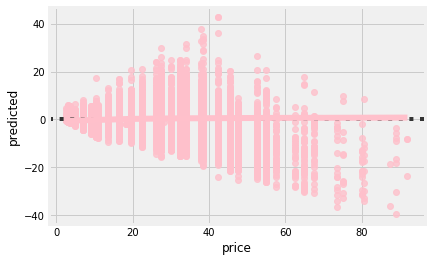

In [93]:
sns.residplot(ly_test['price'],ly_test['predicted'], lowess=True, color="pink")

In [94]:
ly_test['diff'] = ly_test['predicted'] - ly_test['price']

/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
ly_test.head()

,price,predicted,diff
362087,7.0,7.048111,0.048111
392325,47.5,46.375692,-1.124308
151747,27.5,26.878342,-0.621658
523198,16.5,17.367120,0.867120
135199,16.5,16.512257,0.012257


In [99]:
ly_test['diff'].sort_values(ascending = True).head(40000)

45407    -42.699150
434162   -39.033265
231734   -38.905751
46006    -36.771625
470380   -36.548928
518695   -35.335677
430180   -35.242857
335420   -34.338828
129054   -34.136002
447735   -33.656978
55970    -33.355372
177400   -33.178823
347423   -32.809796
214773   -32.481926
298681   -32.403398
30958    -32.003401
506961   -31.937801
443552   -31.758567
533485   -31.328046
96836    -31.054789
438796   -30.829220
307738   -30.643099
520243   -30.556240
537163   -30.140000
231731   -29.868864
320367   -29.862007
27945    -29.666667
60909    -29.666667
425708   -29.595604
227636   -29.586355
            ...    
512998    -0.296321
276693    -0.296228
539544    -0.296209
394580    -0.296196
394579    -0.296196
488662    -0.296195
44848     -0.296120
443800    -0.296118
26185     -0.296118
505912    -0.296112
500877    -0.296055
208339    -0.296020
526510    -0.295955
76686     -0.295927
40181     -0.295913
501891    -0.295903
29085     -0.295892
238600    -0.295850
290594    -0.295850


In [100]:
ly_test[ly_test['price'] - ly_test['predicted'] <= 5].shape

(160767, 3)

In [101]:
#RMSE Score for train data
y_hat_train = gs_2.predict(lX_train)
np.sqrt(mean_squared_error(ly_train, y_hat_train))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


1.410240646850906

In [102]:
#RMSE Score for test data
y_hat_test = gs_2.predict(lX_test)
np.sqrt(mean_squared_error(ly_test['price'], y_hat_test))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.1402271392231835

### Pickling the best model for deployment

In [129]:
pickle.dump(gs_2, open('lyft.pkl','wb'))

[Back to top](#top)

<a name="3rd Model for Lyft Data Using Elastic Net"></a>
## 3rd Model for Lyft Data Using Elastic Net

In [107]:
features = ['distance', 'temp/f', 'cloud cover', 'pressure',
       'rain', 'humidity', 'wind', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared']
lX = lyft_data[features]
ly = lyft_data[['price']]

### Train-Test Split

In [108]:
lX_train, lX_test, ly_train, ly_test = train_test_split(lX,ly,random_state=23, test_size =0.3, shuffle = True)

In [109]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    #('ext', ExtraTreesRegressor()),
    ('en',ElasticNet()),
    #('rtr',  RandomForestRegressor())
    #('lr',LinearRegression()),
    #('svr', SVR()),
    #('xgb', XGBRegressor())
    
    ])
pipe_params = {
   'en__l1_ratio' : [0,0.5,1],
    'en__alpha' : [.0001, .10, 0.5 , 1.0, 2.0]
    
}


In [110]:
lX_train.shape

(382386, 52)

In [111]:
ly_train.shape

(382386, 1)

In [112]:
cross_val_score(pipe, lX_train, ly_train, cv=3).mean()

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Dat

0.7686070504812424

In [113]:
gs_3 = GridSearchCV(pipe, param_grid=pipe_params, cv=3, verbose=1, n_jobs= -1)
gs_3 = gs_3.fit(lX_train,ly_train)
print(gs_3.best_score_)
print(gs_3.best_estimator_)
gs_3.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.0min finished
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.9072101633442554
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('en', ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])


/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'en__alpha': 0.0001, 'en__l1_ratio': 0}

In [114]:
gs_3.score(lX_train,ly_train)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9072573246234856

In [115]:
gs_3.score(lX_test,ly_test)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9049189935696803

In [116]:
ly_pred = gs_3.predict(lX_test)
ly_test['predicted'] = ly_pred

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
ly_test.head()

,price,predicted
362087,7.0,10.620467
392325,47.5,41.632504
151747,27.5,25.735013
523198,16.5,17.371558
135199,16.5,18.633497


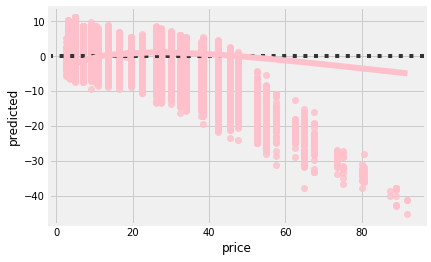

In [118]:
sns.residplot(ly_test['price'],ly_test['predicted'], lowess=True, color="pink")

In [119]:
ly_test['diff'] = ly_test['predicted'] - ly_test['price']

/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
ly_test.head()

,price,predicted,diff
362087,7.0,10.620467,3.620467
392325,47.5,41.632504,-5.867496
151747,27.5,25.735013,-1.764987
523198,16.5,17.371558,0.871558
135199,16.5,18.633497,2.133497


In [124]:
ly_test['diff'].sort_values(ascending = True).head(40000)

425713   -52.653785
45407    -49.880073
516807   -49.720436
55970    -49.646987
217291   -48.408753
223970   -48.408753
354319   -47.100837
434162   -46.861434
137123   -45.544731
452383   -45.342103
449595   -44.878501
449597   -44.870718
449596   -44.861480
338869   -43.883477
425708   -42.496689
227664   -42.314337
430180   -42.307212
393547   -42.242762
101416   -41.847663
463269   -41.743747
232333   -41.614507
324818   -41.560847
46006    -40.986660
349240   -40.646235
360055   -40.520257
310974   -40.442704
44643    -40.150084
447735   -39.627096
298681   -39.505238
231734   -39.268398
            ...    
544979    -1.201740
20009     -1.201720
302608    -1.201663
398096    -1.201663
427740    -1.201629
269385    -1.201594
104052    -1.201478
210359    -1.201454
121609    -1.201454
213058    -1.201449
428535    -1.201328
133493    -1.201328
267333    -1.201185
386250    -1.201183
311588    -1.201164
257603    -1.201041
38625     -1.200958
102279    -1.200865
51653     -1.200865


In [126]:
#RMSE Score for train data
y_hat_train = gs_3.predict(lX_train)
np.sqrt(mean_squared_error(ly_train, y_hat_train))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.989471213584374

In [127]:
#RMSE Score for test data
y_hat_test = gs_3.predict(lX_test)
np.sqrt(mean_squared_error(ly_test['price'], y_hat_test))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


3.0289128627929975

[Back to top](#top)

<a name="4th Model for Lyft Using XGB Regressor"></a>
## 4th Model for Lyft Using XGB Regressor

In [15]:
features = ['distance', 'temp/f', 'cloud cover', 'pressure',
       'rain', 'humidity', 'wind', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared']
lX = lyft_data[features]
ly = lyft_data[['price']]

### Train-Test Split

In [16]:
lX_train, lX_test, ly_train, ly_test = train_test_split(lX,ly,random_state=23, test_size =0.3, shuffle = True)

In [17]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    #('ext', ExtraTreesRegressor()),
    #('en',ElasticNet()),
    #('rtr',  RandomForestRegressor())
    #('lr',LinearRegression()),
    #('svr', SVR()),
    ('xgb', XGBRegressor())
    
    ])
pipe_params = {
    'xgb__max_depth' : [10,15,20]
    
}


In [18]:
lX_train.shape

(382386, 52)

In [19]:
ly_train.shape

(382386, 1)

In [20]:
cross_val_score(pipe, lX_train, ly_train, cv=3).mean()

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[20:25:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[20:26:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[20:27:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9345484023925065

In [21]:
gs_4 = GridSearchCV(pipe, param_grid=pipe_params, cv=3, verbose=1, n_jobs= -1)
gs_4 = gs_4.fit(lX_train,ly_train)
print(gs_4.best_score_)
print(gs_4.best_estimator_)
gs_4.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 32.6min finished
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[21:00:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9572193962942454
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_ch...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])


{'xgb__max_depth': 10}

In [22]:
gs_4.score(lX_train,ly_train)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9690615626444378

In [23]:
gs_4.score(lX_test,ly_test)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.958407028471316

In [24]:
ly_pred = gs_4.predict(lX_test)
ly_test['predicted'] = ly_pred

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
ly_test.head()

,price,predicted
362087,7.0,7.224350
392325,47.5,45.837055
151747,27.5,26.732746
523198,16.5,17.205290
135199,16.5,16.521038


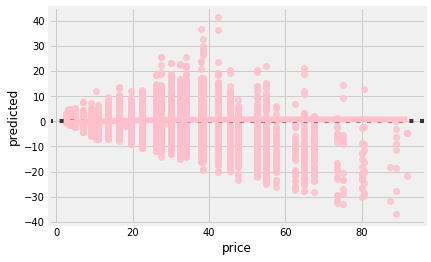

In [26]:
sns.residplot(ly_test['price'],ly_test['predicted'], lowess=True, color="pink")

In [27]:
ly_test['diff'] = ly_test['predicted'] - ly_test['price']

/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
ly_test.head()

,price,predicted,diff
362087,7.0,7.224350,0.224350
392325,47.5,45.837055,-1.662945
151747,27.5,26.732746,-0.767254
523198,16.5,17.205290,0.705290
135199,16.5,16.521038,0.021038


In [29]:
ly_test[ly_test['diff'] <= -5].shape

(2926, 3)

In [30]:
ly_test[ly_test['diff'] >= 5 ].shape

(1005, 3)

In [31]:
ly_test.shape

(163880, 3)

In [32]:
ly_test['diff'].sort_values(ascending = True).head(40000)

45407    -40.391273
177400   -35.503132
470380   -35.274548
434162   -35.159283
231734   -33.990211
447735   -33.064400
298681   -32.469208
129054   -32.184280
506961   -32.066566
45790    -31.776081
46006    -31.512260
55970    -31.069733
96836    -30.404388
425708   -30.132191
41454    -30.010361
227636   -29.635464
429021   -29.524113
335420   -29.501438
30958    -29.457581
181582   -28.561085
537163   -28.108067
333998   -27.984726
231731   -27.924387
265274   -27.669209
533485   -27.384319
214773   -27.228226
320367   -27.087715
250665   -26.600061
438796   -26.581223
452396   -26.568737
            ...    
66499     -0.509363
320342    -0.509363
363792    -0.509266
447234    -0.509266
112920    -0.509266
347446    -0.509266
273306    -0.509243
390161    -0.509141
501801    -0.509139
491425    -0.509139
346027    -0.509139
476031    -0.509121
491223    -0.509121
32111     -0.509063
186714    -0.509063
153427    -0.509062
253096    -0.509060
402114    -0.509055
413707    -0.508919


In [105]:
#RMSE Score for train data
y_hat_train = gs_4.predict(lX_train)
np.sqrt(mean_squared_error(ly_train, y_hat_train))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


1.7266477740794242

In [106]:
#RMSE Score for test data
y_hat_test = gs_4.predict(lX_test)
np.sqrt(mean_squared_error(ly_test['price'], y_hat_test))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.0033178877306965

[Back to top](#top)

<a name="Results of Summary"></a>
# Results of Summary

|Models | Linear Regression | Elastic Net | XGB Regressor | Random Forest Regressor |
| --- | --- | --- | --- | --- |
| Train R^2 |0.907257 | 0.907257|0.969061 |0.979361 |
| Test R^2 |0.904919 | 0.904918|0.958407 |0.952527 |
| Change in R^2 |0.002338 | 0.002339|0.010654 |0.026834 |
| Train RMSE | 2.98947 | 2.98947 |1.72664 |1.41024 |
| Test RMSE | 3.02890 |3.02891 |2.00331 |2.14022|

[Back to top](#top)